Importing necessary packages and libraries.

In [1]:
#Working With DataFrames
import pandas as pd
import numpy as np

#Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('Resources/data.csv')
df.head(3)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2.0,Nibble,3,299,0,1.0,1,7,0,1,...,1,1,100.0,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1,2
1,2.0,No Name Yet,1,265,0,1.0,1,2,0,2,...,1,1,0.0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2,0
2,1.0,Brisco,1,307,0,1.0,2,7,0,2,...,1,1,0.0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7,3


The following are the data fields corresponding to our project, which we obtained on Kaggle.com:
PetID - Unique hash ID of pet profile 
AdoptionSpeed - Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.

Type - Type of animal (1 = Dog, 2 = Cat)
Name - Name of pet (Empty if not named)
Age - Age of pet when listed, in months
Breed1 - Primary breed of pet (Refer to BreedLabels dictionary)
Breed2 - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)
Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
Color1 - Color 1 of pet (Refer to ColorLabels dictionary)
Color2 - Color 2 of pet (Refer to ColorLabels dictionary)
Color3 - Color 3 of pet (Refer to ColorLabels dictionary)
MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)
Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
Quantity - Number of pets represented in profile
Fee - Adoption fee (0 = Free)
State - State location in Malaysia (Refer to StateLabels dictionary)
RescuerID - Unique hash ID of rescuer
VideoAmt - Total uploaded videos for this pet
PhotoAmt - Total uploaded photos for this pet
Description - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.

At first glance, we saw a variable PetID, which we believed should have no predictive value. On the other hand, the variable Vaccinated is likely to be predictive (before analyzing the data, we believed that a pet that is vaccinated would be more likely to be adopted than a pet that is not vaccinated).

In [3]:
df.shape

(14993, 24)

This means the dataset has 24 columns and 14,993 rows

In [4]:
df.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14991.000000,14993.000000,14993.000000,14993.000000,14991.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14992.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457608,10.452078,265.272594,74.009738,1.776132,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259405,41346.028347,0.056760,3.889215,2.516441
std,0.498216,18.155790,60.056818,123.011575,0.681535,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.417131,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


To make headers consistent and help with regressions etc. , cleaning them up to all be lower case

In [5]:
df.columns=[i.lower() for i in df.columns]

Next, we found the amount of null values by column. Null values of a column could be a bad thing - if we find a null value for a column that we care about, we might have to throw out the entire row/datapoint. On the other hand, if the null value is for a variable that is not predictive, it might not matter. In some cases, it will be fine to fill in the data with key statistics such as the mean or mode. Either way, it's important to have a clean dataset.

In [6]:
df.isna().sum()

type                2
name             1257
age                 0
breed1              0
breed2              0
gender              2
color1              0
color2              0
color3              0
maturitysize        0
furlength           0
vaccinated          0
dewormed            0
sterilized          0
health              0
quantity            0
fee                 1
state               0
rescuerid           0
videoamt            0
description        12
petid               0
photoamt            0
adoptionspeed       0
dtype: int64

First, we dealt with "type." This variable tells us if the pet is a dog or a cat. With missing type, we don't know if the data point is a dog or a cat, and therefor we dropped the entire row.

In [7]:
df = df.dropna(subset=['type'])
df.isna().sum()

type                0
name             1257
age                 0
breed1              0
breed2              0
gender              2
color1              0
color2              0
color3              0
maturitysize        0
furlength           0
vaccinated          0
dewormed            0
sterilized          0
health              0
quantity            0
fee                 1
state               0
rescuerid           0
videoamt            0
description        12
petid               0
photoamt            0
adoptionspeed       0
dtype: int64

Next we dealt with the null value for "fee." We looked at the distribution:

In [8]:
df['fee'].value_counts().head(5)/len(df['fee'])

0.0      0.844573
50.0     0.031219
100.0    0.027216
200.0    0.014609
150.0    0.010806
Name: fee, dtype: float64

Nearly 85% of the fee values are 0, so we decided to replace null values with the (overwhelmingly popular) mode.

In [9]:
df['fee'].fillna(0,inplace=True)
df.isna().sum()

type                0
name             1257
age                 0
breed1              0
breed2              0
gender              2
color1              0
color2              0
color3              0
maturitysize        0
furlength           0
vaccinated          0
dewormed            0
sterilized          0
health              0
quantity            0
fee                 0
state               0
rescuerid           0
videoamt            0
description        12
petid               0
photoamt            0
adoptionspeed       0
dtype: int64

We decided to remove the variable "name" since it likely has no predictive power and the column has a lot of missing values.

In [10]:
df = df.drop('name',axis=1).dropna()
df.shape

(14977, 23)

In [11]:
df.isna().sum()

type             0
age              0
breed1           0
breed2           0
gender           0
color1           0
color2           0
color3           0
maturitysize     0
furlength        0
vaccinated       0
dewormed         0
sterilized       0
health           0
quantity         0
fee              0
state            0
rescuerid        0
videoamt         0
description      0
petid            0
photoamt         0
adoptionspeed    0
dtype: int64

According to the description, type 1 is a dog and type 2 is a cat. But, we want to see if we could figure that out on our own, by analyzing the description string.

In [12]:
df_type_test=df.loc[df['description'].str.contains('dog'),:]
df_type_test['type'].value_counts()/len(df_type_test)

1.0    0.924496
2.0    0.075504
Name: type, dtype: float64

Over 92% of the description strings that include the string"dog" are type 1! Thus, we would also have concluded that type 1 is a dog.
We found the percentage of the dataset that is dogs vs. cats, and began visualizing.

In [13]:
df['type'].value_counts()/len(df['type'])

1.0    0.542632
2.0    0.457368
Name: type, dtype: float64

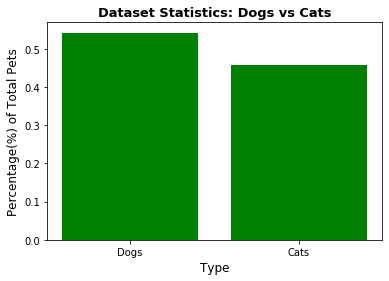

In [14]:
x=['Dogs','Cats']
y=[.542632,.457368]
plt.bar(x,y,color='g')
plt.title('Dataset Statistics: Dogs vs Cats',fontsize=13,fontweight='bold')
plt.xlabel('Type',fontsize=12)
plt.ylabel('Percentage(%) of Total Pets',fontsize=12)
plt.show()

Next, Analyzing Adoption Speed as horizontal graph

Text(0, 0.5, 'Adoption Rate')

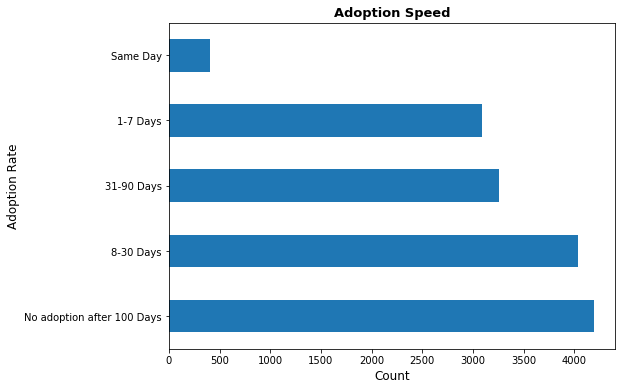

In [15]:
df['adoptionspeed'].value_counts().rename(
    {0:'Same Day',
     1:'1-7 Days',
     2:'8-30 Days',
     3:'31-90 Days',
     4:'No adoption after 100 Days'}).plot(kind='barh',figsize=(8,6))
plt.title('Adoption Speed', fontsize=13,fontweight='bold')
plt.xlabel('Count',fontsize=12)
plt.ylabel('Adoption Rate',fontsize=12)

In [16]:
df['adoptionspeed'].value_counts()

4    4193
2    4031
3    3255
1    3088
0     410
Name: adoptionspeed, dtype: int64

In [17]:
round(len(df.loc[df['adoptionspeed']==4])/len(df),2)

0.28

Sadly, nearly 28% of all pets in our dataset were not adopted after 100 days.
We wanted to find out, is the adoption speed better (with a corresponding smaller value) for dogs or cats?

In [18]:
df.groupby(['type']).agg({'adoptionspeed':'mean'})

,adoptionspeed
type,
1.0,2.615233
2.0,2.398978


This data shows us that cats are more likely to be adopted quicker than dogs.
We found that 28% of all pets are not adopted after 100 days. We decided to filter on several characteristics to see if we could deduce some characteristics which help make pets more likely to be adopted. We filtered on pets who possess all of the following characteristics at the same time - are vaccinated, are dewormed, are sterilized, are either healthy or have only a minor injury, have no adoption fee, and age of less than 1 year.

In [19]:
vaccinated_list=[1]
dewormed_list=[1]
sterilized_list=[1]
health_list=[1,2]
fee_list=[0]
age_list=[1,2,3,4,5,6,7,8,9,10,11,12]

df_filter_adj=df.loc[df['vaccinated'].isin(vaccinated_list)&df['dewormed'].isin(dewormed_list)&
       df['sterilized'].isin(sterilized_list)&df['health'].isin(health_list)&
       df['fee'].isin(fee_list)&df['age'].isin(age_list)]
df_filter_adj['adoptionspeed'].value_counts()/len(df_filter_adj)

4    0.398974
3    0.269744
2    0.220513
1    0.087179
0    0.023590
Name: adoptionspeed, dtype: float64

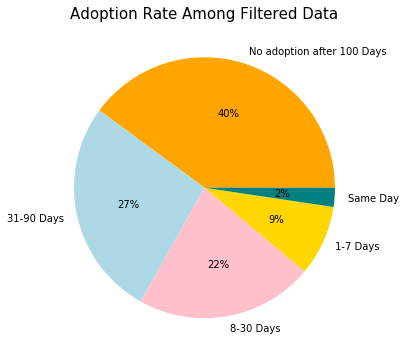

['No adoption after 100 Days',
 '31-90 Days',
 '8-30 Days',
 '1-7 Days',
 'Same Day']

In [20]:
labels=['No adoption after 100 Days','31-90 Days','8-30 Days','1-7 Days','Same Day']
sizes=df_filter_adj['adoptionspeed'].value_counts().values
colors=['orange','lightblue','pink','gold','teal']
explode=[0,0,0,0,0]
plt.style.use('seaborn-pastel')
plt.figure(figsize=(6,6))
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct= '%1.0f%%')
plt.title('Adoption Rate Among Filtered Data',fontsize=15)
plt.show()
labels

Text(0, 0.5, 'Distribution')

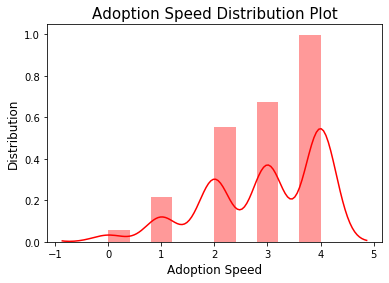

In [21]:
sns.distplot(df_filter_adj['adoptionspeed'],color = "red")
plt.title('Adoption Speed Distribution Plot',fontsize=15)
plt.xlabel('Adoption Speed',fontsize=12)
plt.ylabel('Distribution',fontsize=12)

Surprisingly, 40% of our sliced dataset were not adopted.

Plan Ahead: 

1) split data into two approx equal sized buckets based on outcomes. Bucket 1 -- No adoption after 31+ days  & Bucket 2 -- Adopted within 31 days 

2) predict which row each bucket lands in using two predictors.
        
        a) train test, split data test
        b) run cross validation to tune the hyper paramters of a random forest model on the train dataset
        c) once satisfied, run final model on test data set
        
3)  Add features/inputs to either model, repeat step 2

4)  once satisfied with model to do prediction with two buckets, move to a new model that predicts all of the adoption times seperately by following steps 1 thorugh 3 but with all buckets seperate 

*between all steps do investigations on data, maybe create models for cats and dogs seperately, predictors working for specific type of pet / is a predicator better for a model-- re-run step 2 


    Correlation Matrix of the variables
  

Text(0.5, 1, 'Correlation Between All Variables')

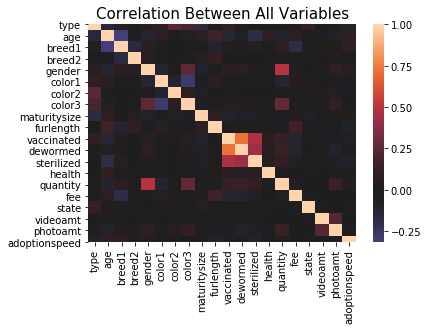

In [22]:
sns.heatmap(df.corr(),center=0,annot=False)
plt.title('Correlation Between All Variables',fontsize=15)

This graphic is clearly too busy, so we show only certain columns.

Text(33.0, 0.5, 'Variable')

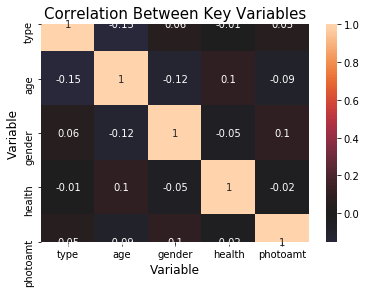

In [23]:
sns.heatmap(round(df[['type','age','gender','health','photoamt']].corr(),2),center=0,annot=True)
plt.title('Correlation Between Key Variables',fontsize=15)
plt.xlabel('Variable',fontsize=12)
plt.ylabel('Variable',fontsize=12)

In [24]:
#Machine Learning Packages
import statsmodels.formula.api as smf
import patsy
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression as reg
from sklearn.linear_model import LogisticRegression as logistic
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.neighbors import KNeighborsClassifier as knnc
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import train_test_split

In [25]:
y,X = patsy.dmatrices('adoptionspeed ~ type + age + breed1 + gender + quantity + maturitysize + vaccinated + dewormed + sterilized + health + photoamt',
                      data=df)

In [26]:
reg().fit(X,y).score(X,y)

0.05332327228800893

In [27]:
cross_val_score(reg(),X,np.ravel(y),cv=5).mean()

0.05161516117574403

We found R squared for Multiple Linear Regression - 5.36%.

In [28]:
knn().fit(X,y).score(X,y)

0.30472111310440975

We found R Squared for K-Nearest Neighbors. (We are aware that the below score can be based on an overfitted model)
To alleviate the overfitting problem, we used 5-fold cross validation to get a more realistic score.

In [29]:
cross_val_score(knn(),X,np.ravel(y),cv=5).mean()

0.015921865420894642

When using cross validation, the result from the knn model is worse than the one from the regression model.
Let's try random forest model.
We also decided to test the model via classification, where we segmented the "y" into two categories - (1) a pet is adopted within 100 days (adoption speeds between 0 and 3), (2) a pet is not adopted (adoption speed 4).
We denoted "1" for a pet adopted within 100 days and '0' for a pet not adopted.

In [30]:
df['adoption_indicator'] = np.where(df['adoptionspeed']==4,0,1)

In [31]:
y,X = patsy.dmatrices('adoption_indicator ~ type + age + breed1 + gender + quantity + maturitysize + vaccinated + dewormed + sterilized + health + photoamt',
                      data=df)

In [32]:
y = np.ravel(y)

In [33]:
yhat = logistic().fit(X,y).predict(X)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
pd.Series(yhat).value_counts()

1.0    14462
0.0      515
dtype: int64

In [35]:
df['adoption_indicator'].value_counts()

1    10784
0     4193
Name: adoption_indicator, dtype: int64

In [36]:
df['yhat'] = logistic().fit(X,y).predict(X)
df.pivot_table(index='adoption_indicator',columns='yhat',values='rescuerid',aggfunc='count')/len(df)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


yhat,0.0,1.0
adoption_indicator,,
0,0.017961,0.262002
1,0.016425,0.703612


In [37]:
cross_val_score(logistic(),X,y,cv=5).mean()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.7214403055285691

The "confusion matrix" above shows that the model correctly predicts adoption only 72% of the time, using a logistic regression. Cross validation using the regression classifier model also returns a similar result.
We then analyzed classification under k-nearest neighbors.

In [38]:
pd.Series(knnc().fit(X,y).predict(X)).value_counts()

1.0    12032
0.0     2945
dtype: int64

In [39]:
knnc().fit(X,y).score(X,y)

array(0.79915871)

The above result shows that a knn model returns a model with almost 80% accuracy. 

In [40]:
df['yhat_knn']=knnc().fit(X,y).predict(X)
df

,type,age,breed1,breed2,gender,color1,color2,color3,maturitysize,furlength,...,state,rescuerid,videoamt,description,petid,photoamt,adoptionspeed,adoption_indicator,yhat,yhat_knn
0,2.0,3,299,0,1.0,1,7,0,1,1,...,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1,2,1,1.0,1.0
1,2.0,1,265,0,1.0,1,2,0,2,2,...,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2,0,1,1.0,1.0
2,1.0,1,307,0,1.0,2,7,0,2,2,...,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7,3,1,1.0,1.0
3,1.0,4,307,0,2.0,1,2,0,2,1,...,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8,2,1,1.0,1.0
4,1.0,1,307,0,1.0,1,0,0,2,1,...,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3,2,1,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14985,1.0,24,179,307,1.0,2,3,7,2,2,...,41326,719987dce7aeb027fdfa91b480800199,0,been at my place for a while..am hoping to fin...,e7f7066b6,0,4,0,1.0,1.0
14987,1.0,6,195,0,2.0,1,7,0,1,3,...,41401,79309f4027f2fedb4349a298c69fe56f,0,ooooo,4d163b731,1,0,1,1.0,1.0
14988,2.0,2,266,0,3.0,1,0,0,2,2,...,41326,61c84bd7bcb6fb31d2d480b1bcf9682e,0,I have 4 kittens that need to be adopt urgentl...,dc0935a84,3,2,1,1.0,1.0
14989,2.0,60,265,264,3.0,1,4,7,2,2,...,41326,1d5096c4a5e159a3b750c5cfcf6ceabf,0,Serato(female cat- 3 color) is 4 years old and...,a01ab5b30,3,4,0,0.0,1.0


In [41]:
df.pivot_table(index='adoption_indicator',columns='yhat_knn',values='rescuerid',aggfunc='count')/len(df)

yhat_knn,0.0,1.0
adoption_indicator,,
0,0.137878,0.142085
1,0.058757,0.661281


The "confusion matrix" above shows that the model correctly predicts adoption 80% of the time. (We are aware that this model may have overfitting problems)
Now we wanted to tune for the optimal k value.

In [42]:
for i in range(50,70):
    print(i,cross_val_score(knnc(i),X,np.ravel(y),cv=5).mean())

50 0.7410027054055359
51 0.7424049536120936
52 0.7426053097909497
53 0.7428057552004107
54 0.7428057105627747
55 0.7420043080619441
56 0.742872421629149
57 0.742004151993998
58 0.7421380200713237
59 0.7430058438363436
60 0.7418039964313892
61 0.7415368845634116
62 0.7432729111113525
63 0.7432066236260692
64 0.7419376192101638
65 0.7433400235293348
66 0.742805844341681
67 0.7416708195227457
68 0.743072755593411
69 0.7419377753972229


After tuning the parameters, the model returns the best accuracy when n_neighbors = 65. The accuracy of the model is 0.7433400235293348.